In [3]:
from dgp import dgp
from kernel_class import kernel, combine
from synthetic import path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Synthetic Data Generation

In [5]:
ker1=kernel(length=np.array([1]),scale=1,nugget=1e-8,name='sexp')
ker2=kernel(length=np.array([1]),scale=1,nugget=1e-8,name='sexp')
ker3=kernel(length=np.array([1]),scale=1,nugget=1e-8,name='sexp')
ker_all=combine(ker1,ker2,ker3,ker3,ker3,ker3)

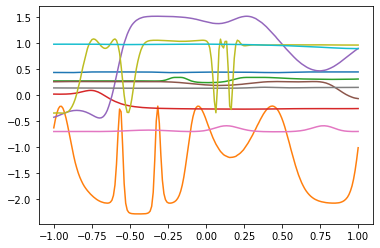

In [6]:
n=200
N=10
data=np.linspace(-1,1,n)[:,None]
syn=path(data,ker_all)
samp=syn.generate(N)
p=plt.plot(data,samp) 

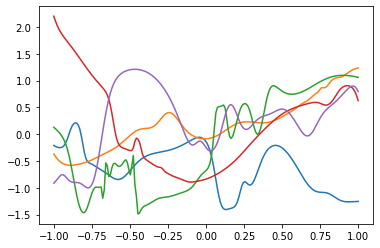

In [8]:
ker1=kernel(length=np.array([1]),scale=1,nugget=1e-8,name='sexp')
ker2=kernel(length=np.array([1,1]),scale=1,nugget=1e-8,name='sexp',connect=1)
ker3=kernel(length=np.array([1,1]),scale=1,nugget=1e-8,name='sexp',connect=1)
ker_all=combine(ker1,ker2,ker3,ker3,ker3,ker3)
n=200
N=5
data=np.linspace(-1,1,n)[:,None]
syn=path(data,ker_all)
samp=syn.generate(N)
p=plt.plot(data,samp) 

In [9]:
ker1=kernel(length=np.array([1,1]),scale=1,nugget=1e-8,name='sexp')
ker2=kernel(length=np.array([1,1]),scale=1,nugget=1e-8,name='sexp',connect=1)
ker3=kernel(length=np.array([1,1]),scale=1,nugget=1e-8,name='sexp',connect=1)
ker_all=combine(ker1,ker2,ker3,ker3,ker3,ker3)

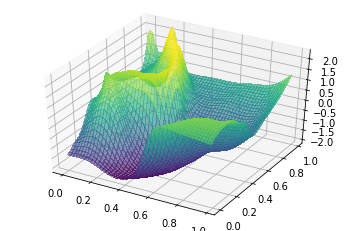

In [11]:
X = np.arange(0, 1, 0.02)
Y = np.arange(0, 1, 0.02)
X, Y = np.meshgrid(X, Y)
data=np.vstack((X.flatten(),Y.flatten())).T
syn=path(data,ker_all)
samp=syn.generate(1)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, np.reshape(samp,np.shape(X)), cmap='viridis', edgecolor='none',
                       linewidth=0, antialiased=False,alpha=0.6)
ax.view_init(elev=40., azim=-60)